In [1]:
# @title Sizes-Est'd_price-Num_usable_rooms-Sell_price
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

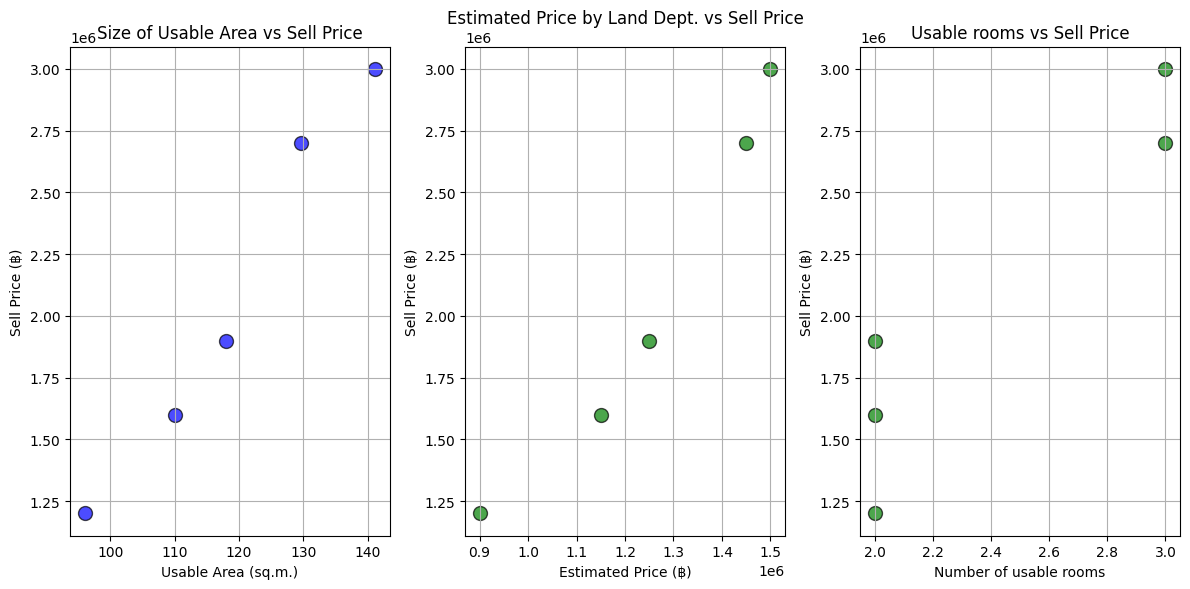

In [2]:
# Data + user request
sizes = [96.0, 118.0, 141.2, 129.6, 110.0] # Size of usable area in sq.m.
est_prices = [900000, 1250000, 1500000, 1450000, 1150000] # Room estimated prices by department of lands in Baht
rooms = [2, 2, 3, 3, 2] # Number of rooms
sell_prices = [1200000, 1900000, 3000000, 2700000, 1600000] # Room appraisal prices in Baht
# Create figure and axes for Size-Price plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
# Plot Size vs Price
ax1.scatter(sizes, sell_prices, color='b', s=100, edgecolors='black', alpha=0.7)
ax1.set_xlabel('Usable Area (sq.m.)')

ax1.set_ylabel('Sell Price (฿)')
ax1.set_title('Size of Usable Area vs Sell Price')
ax1.grid(True)

# Plot Est'd price vs Price
ax2.scatter(est_prices, sell_prices, color='g', s=100, edgecolors='black', alpha=0.7)
ax2.set_xlabel('Estimated Price (฿)')
ax2.set_ylabel('Sell Price (฿)')
ax2.set_title('Estimated Price by Land Dept. vs Sell Price')
ax2.grid(True)

# Plot Rooms vs Price
ax3.scatter(rooms, sell_prices, color='g', s=100, edgecolors='black', alpha=0.7)
ax3.set_xlabel('Number of usable rooms')
ax3.set_ylabel('Sell Price (฿)')
ax3.set_title('Usable rooms vs Sell Price')
ax3.grid(True)
plt.tight_layout()
plt.show()

1นักวิเคราะห์ท่านนี้ควรใช้ตัวแปรต้นใดที่สร้างความสัมพันธ์ระหว่างตัวแปรต้นต่อตัวแปรตามได้สัมพันธ์ที่สุดอ้างอิง
จากการประเมินค่าความผันแปรของตัวแปรตอบสนองที่สามารถอธิบายได้ (R-square) (คะแนน 8%)

In [3]:
#Checking the correlation

# Create DataFrame
data = {
'Size': sizes,
'Est_Price': est_prices,
'Rooms': rooms,
'Sell_Price': sell_prices
}
df = pd.DataFrame(data)
# Display the DataFrame
df

,Size,Est_Price,Rooms,Sell_Price
0,96.0,900000,2,1200000
1,118.0,1250000,2,1900000
2,141.2,1500000,3,3000000
3,129.6,1450000,3,2700000
4,110.0,1150000,2,1600000


                                       Correlation Matrix                                       


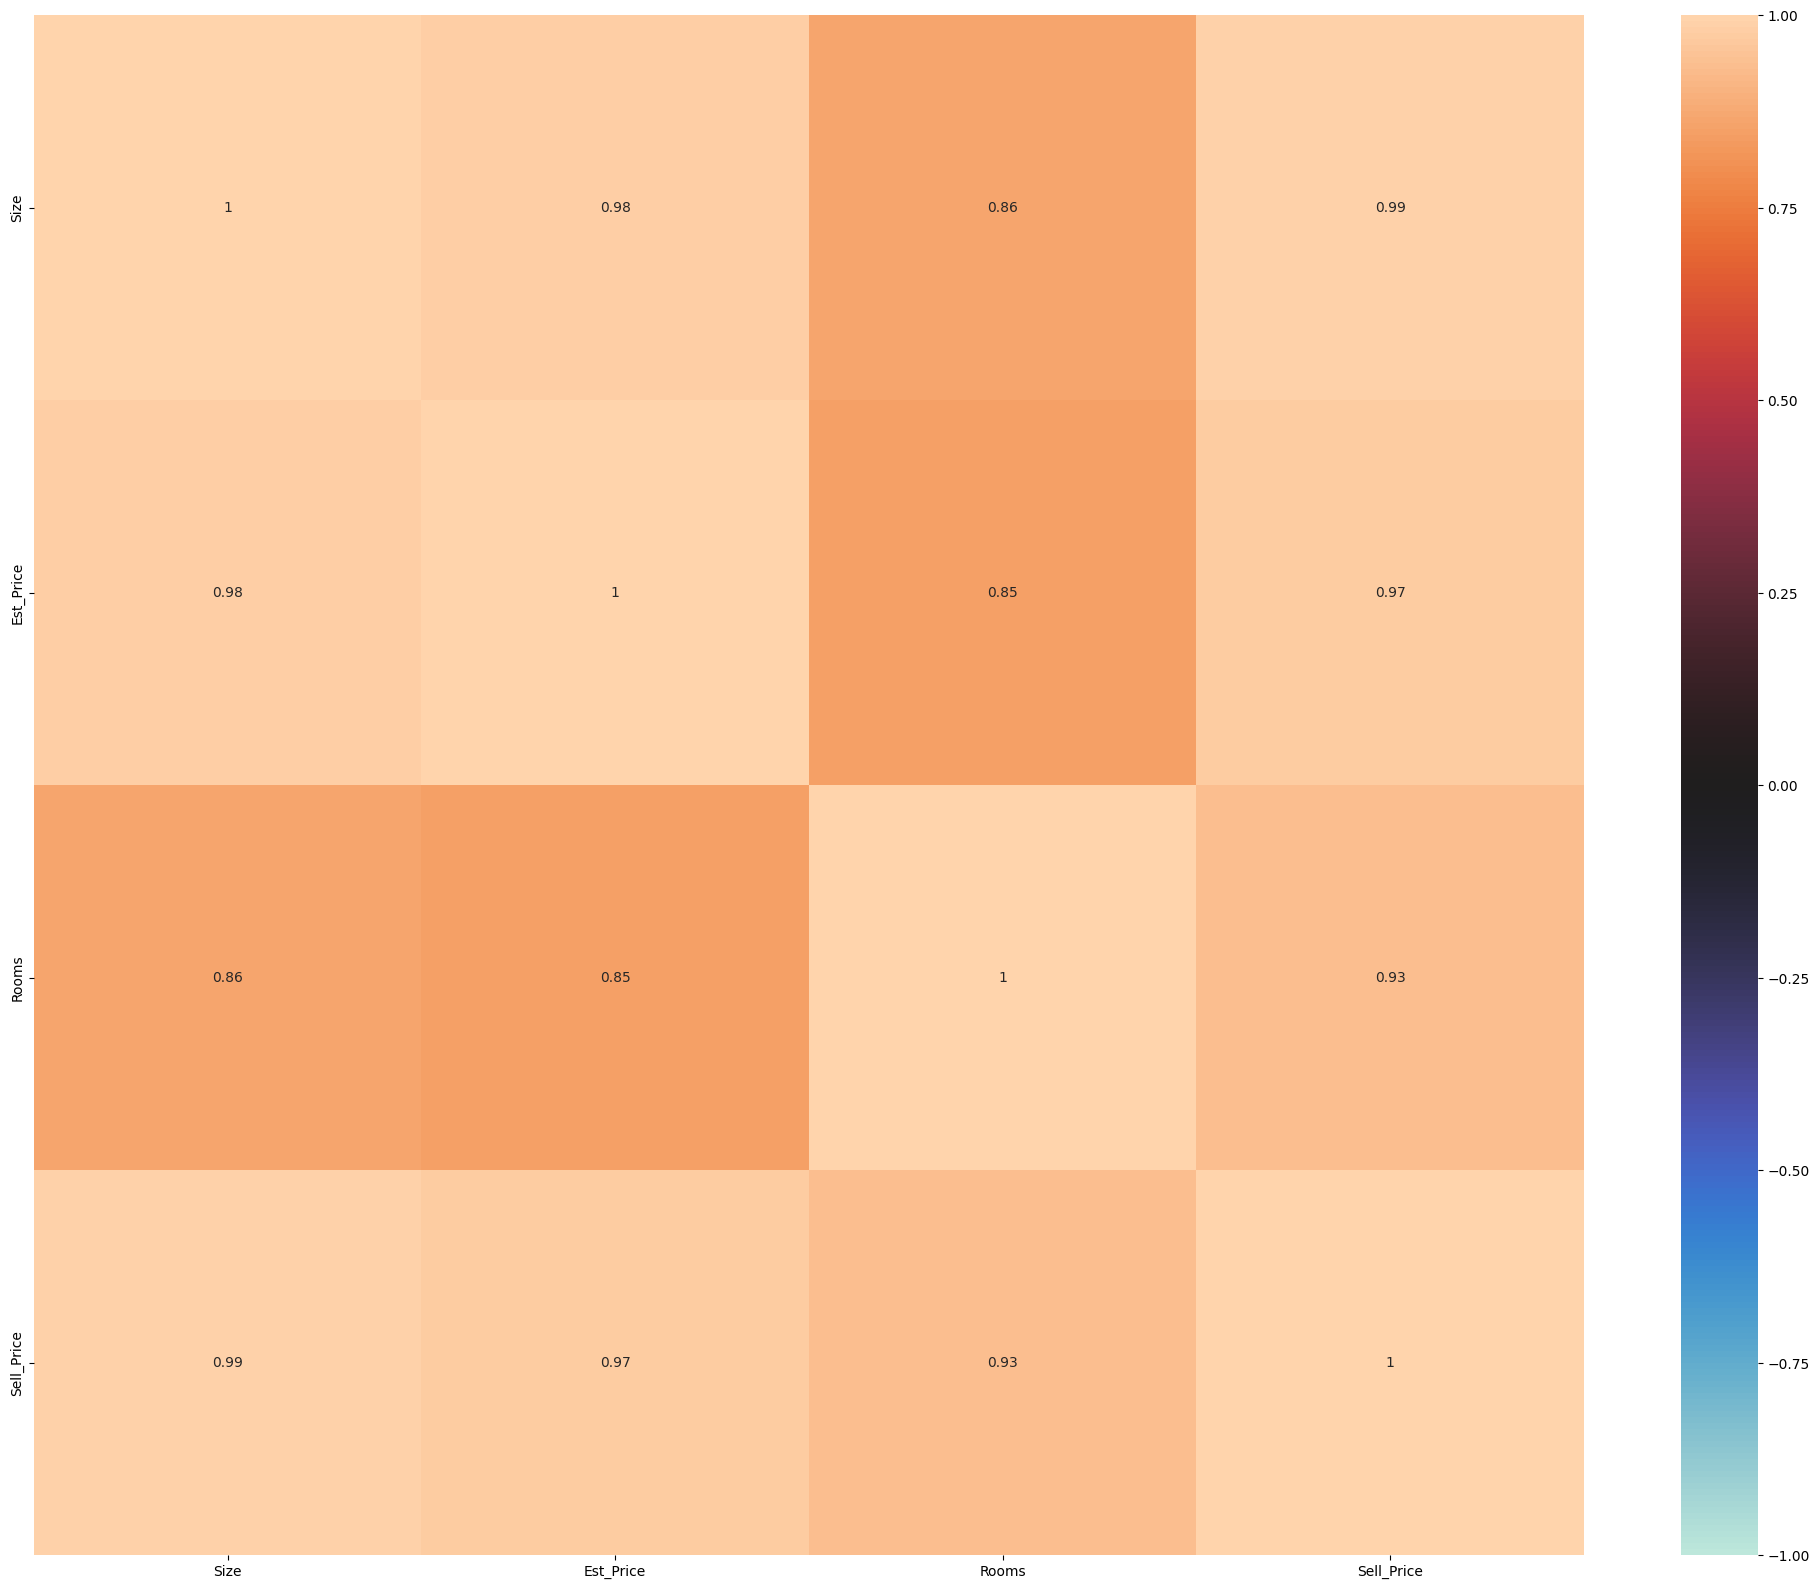

In [4]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

ตอบ ใช้คู่ตัวแปรระหว่าง size และ sell price อ้างอิงจากการ plot หา correlation ระหว่างตัวแปร ซึ่งพบว่าคู่นี้สัมพันธ์กันมากที่สุด (R-Square = (correlation)^2)

2.) จากโมเดลข้อ 1.1 ให้ประเมินรายคาขายห้องของลูกค้าท่านหนึ่งที่ป้อนเข้ามาว่าต้องการขายห้องชุดของตนที่มีขนาด
125 ตารางเมตร ราคาประเมินจากกรมที่ดิน 1,300,000 บาท และมีห้องย่อย 3 ห้อง นักวิเคราะห์คาดการณ์ราคา
ขายห้องที่ควรจะเป็นในช่วงราคา 2,100,000-2,299,999 บาทหรือใกล้เคียง (คะแนน 2%)

In [5]:
from sklearn.preprocessing import StandardScaler

# เลือก Feature และ Transform data

std = StandardScaler()

target = 'Sell_Price'
X_train = df.drop([target],axis=1)
Y_train = df[target]

X_train = std.fit_transform(X_train)

X_test = np.array([125, 1300000 ,3])
# X_test = np.array([112, 1250000 ,3])
X_test = std.transform(X_test.reshape(1, -1))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
X_train

array([[-1.47216272, -1.61442961, -0.81649658],
       [-0.06155384,  0.        , -0.81649658],
       [ 1.42599734,  1.15316401,  1.22474487],
       [ 0.68222175,  0.92253121,  1.22474487],
       [-0.57450252, -0.4612656 , -0.81649658]])

In [7]:
X_test

array([[0.38727625, 0.2306328 , 1.22474487]])

In [8]:
# สร้างโมเดล
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
X_poly1 = poly_reg.fit_transform(X_test)
PR = LinearRegression()
PR.fit(X_poly, Y_train)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

In [9]:
# ผลการประเมิน train set
print("ผลการประเมิน train set")
print(f"r2_score {r2_score(Y_train, pred1)}")
print(f"rmse {np.sqrt(mean_squared_error(Y_train, pred1))}")

ผลการประเมิน train set
r2_score 1.0
rmse 3.123750878730495e-10


In [10]:
print(f"ราคาขายที่ทํานายได้: {pred2[0]}")

ราคาขายที่ทํานายได้: 2414633.534348811


ตอบผลลัพธ์ที่ได้จากการประเมินของโมเดล คือประมาณ 2,414,633 บาท